In [ ]:
# Monte Carlo Simulation - Logit Model 
## Fabrizio Leone
## 08 - 04 - 2019

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import time
np.random.seed(10)

time elapsed: 2.755653142929077 seconds
Mean across MC repetitions: [ 0.22135218 -0.10471825]


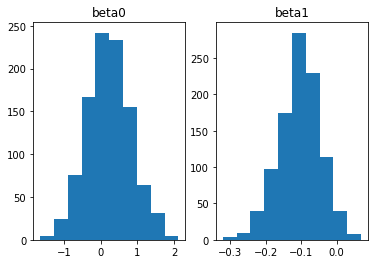

In [3]:
# Define True parameters
N     = 100
beta  = np.array([0.2, -0.1])
rep   = 1000

# Define obj. function
def logit_obj(beta):
    prob = np.exp(X@beta) / (1 + np.exp(X@beta))
    l    = np.log(y*prob + (1-y)*(1-prob))
    nll  = -np.mean(l)
    return nll

# Define gradient

def logit_gr(beta):
    prob = np.exp(X@beta) / (1 + np.exp(X@beta))
    v    = np.transpose(np.array([y*prob,y*prob]))
    u    = np.transpose(np.array([(1-y)*prob,(1-y)*prob]))
    s    = v*X - u*X
    ns   = -np.mean(s,0)
    return ns

# Run Monte Carlo simulation
res_out    = []
start      = time.time()
for i in range(rep):
    X      = np.transpose(np.array([np.repeat(1,N), np.random.chisquare(10,N)]))
    e      = np.random.logistic(0,1,N)
    y      = X@beta > e
    y      = y.astype(int)
    #res    = minimize(logit_obj, beta, jac=logit_gr)
    res    = minimize(logit_obj, beta)
    res_out.append(res.x)
end        = time.time()
print("time elapsed:", end-start, "seconds")

# Print mean of estimates across MC repetitions

res_out = np.array(res_out)
print("Mean across MC repetitions:", np.mean(res_out,0))

# Plot estimates distribution across MC repetitions
plt.subplot(1, 2, 1)
plt.hist(res_out[:,0])
plt.title("beta0")

plt.subplot(1, 2, 2)
plt.hist(res_out[:,1])
plt.title("beta1")

plt.show()